# Introduction

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Get data
df = pd.read_csv('data/ratings.csv')

In [4]:
# First 5
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
# Size
df.shape

(100836, 4)

In [6]:
# Rename columns
df.columns = ['usuarioID','peliculaID','nota','instante']

In [7]:
df.sample()

,usuarioID,peliculaID,nota,instante
56761,377,7063,5.0,1340343282


In [8]:
# Get serie 
df['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [9]:
# Get unique value 
df['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [10]:
# Get counts by value
df['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [11]:
# Mean value
df['nota'].mean()

3.501556983616962

# Visualizacion de los datos

<AxesSubplot: ylabel='Frequency'>

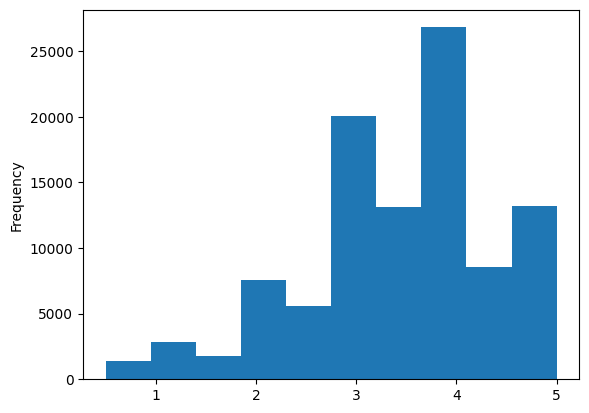

In [12]:
# Histogram
df.nota.plot(kind='hist')

In [13]:
# Describe data
df.describe()

,usuarioID,peliculaID,nota,instante
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [14]:
import seaborn as sns

<AxesSubplot: >

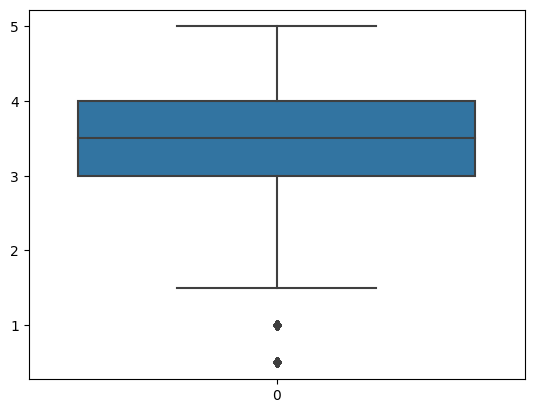

In [15]:
sns.boxplot(df.nota)

## Analizando notas de peliculas

In [16]:
movies = pd.read_csv('./data/movies.csv')

In [17]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
movies.columns = ['peliculaID','titulo','genero']
movies.sample()

,peliculaID,titulo,genero
9042,141718,Deathgasm (2015),Comedy|Horror


In [19]:
df.query('peliculaID == 1')

,usuarioID,peliculaID,nota,instante
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [20]:
df.query('peliculaID == 1').nota.mean()

3.9209302325581397

# Analisis exploratorio

In [21]:
movie_means = df.groupby('peliculaID').mean().nota
movie_means.head()

peliculaID
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<AxesSubplot: ylabel='Frequency'>

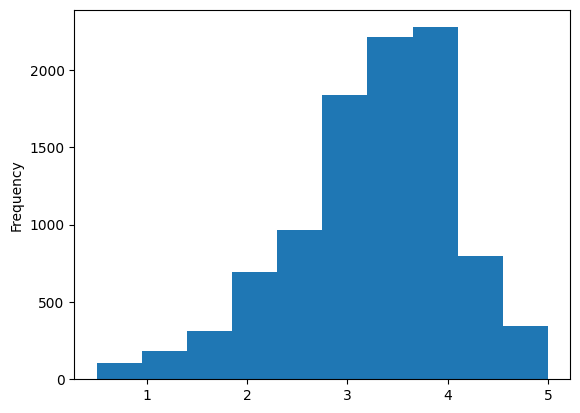

In [22]:
movie_means.plot(kind='hist')

In [23]:
sns.boxplot(movie_means)

KeyError: 0

In [24]:
movie_means.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

<AxesSubplot: xlabel='nota', ylabel='Count'>

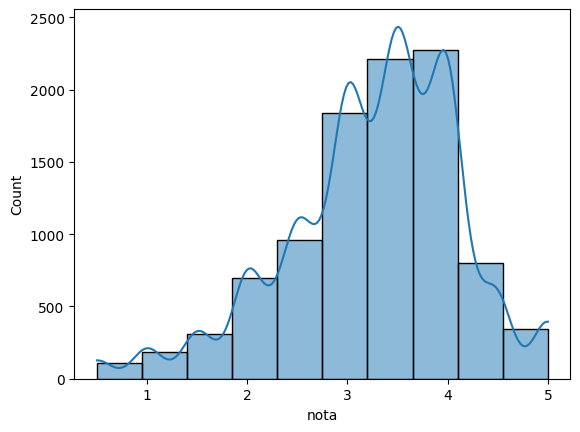

In [25]:
sns.histplot(movie_means,bins=10,kde=True)

Text(0.5, 1.0, 'Histograma de los promedios de las peliculas')

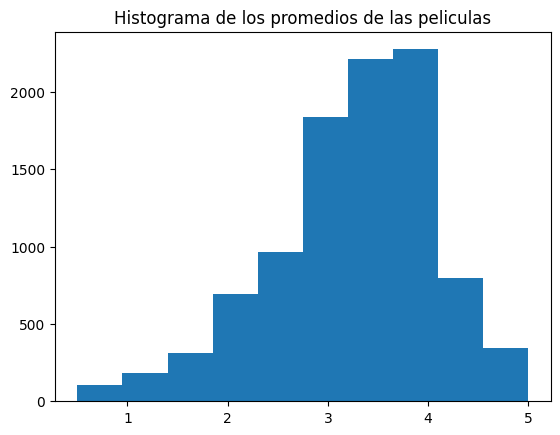

In [26]:
plt.hist(movie_means)
plt.title('Histograma de los promedios de las peliculas')

<AxesSubplot: ylabel='nota'>

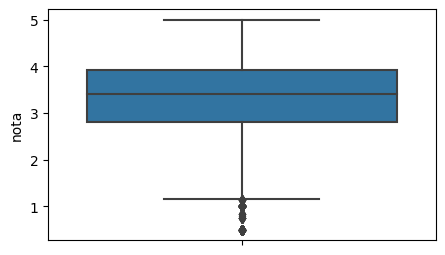

In [27]:
plt.figure(figsize=(5,3))
sns.boxplot(y=movie_means)

In [28]:
# Datatypes

In [29]:
tmp = pd.read_csv('./data/tmdb_5000_movies.csv')
tmp.sample()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4349,1000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",NaN,39833,"[{""id"": 393, ""name"": ""civil war""}]",en,Love Me Tender,Elvis Prestley's first film is a Civil War drama.,1.444258,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1956-11-15,9000000,89.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,HEAR ELVIS SING . . .,Love Me Tender,5.5,21


In [30]:
tmp.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [31]:
# Serie
tmp.original_language.value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

In [32]:
# Serie to Dataframe
tmp.original_language.value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ru,11


In [33]:
# Numeric index
tmp.original_language.value_counts().to_frame().reset_index()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


In [34]:
language_count = tmp.original_language.value_counts().to_frame().reset_index()
language_count.columns = ['idioma_original','total']

In [35]:
language_count.head()

,idioma_original,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<AxesSubplot: xlabel='idioma_original', ylabel='total'>

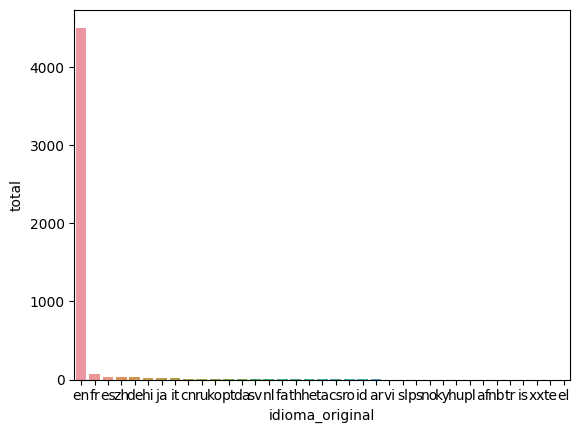

In [36]:
sns.barplot(x='idioma_original',y='total',data=language_count)

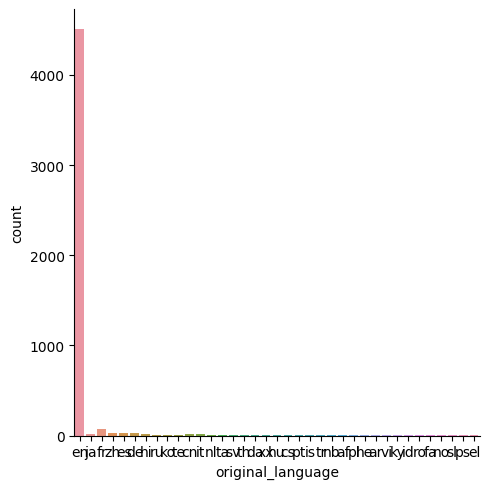

In [39]:
sns.catplot(x='original_language',kind='count',data=tmp)

([<matplotlib.patches.Wedge at 0x2696d5acd30>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(

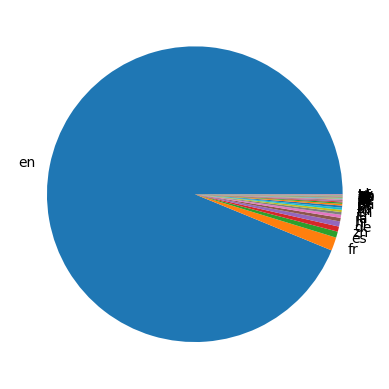

In [40]:
# Pie 
plt.pie(language_count.total,labels=language_count.idioma_original)

In [45]:
total_by_language = tmp.original_language.value_counts()
total = total_by_language.sum()
total_english = total_by_language.loc['en']
total_diff = total - total_english

In [47]:
print(total,total_english,total_diff)

4803 4505 298


In [48]:
data = {
    'idioma' :['ingles','otros'],
    'total' :[total_english,total_diff]
}

In [49]:
data

{'idioma': ['ingles', 'otros'], 'total': [4505, 298]}

In [51]:
data = pd.DataFrame(data)
data

,idioma,total
0,ingles,4505
1,otros,298


<AxesSubplot: xlabel='idioma', ylabel='total'>

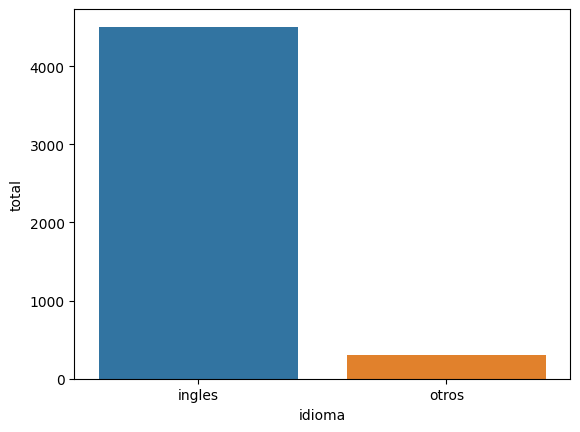

In [54]:
sns.barplot(x='idioma',y='total',data=data)

([<matplotlib.patches.Wedge at 0x2696f39d970>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'otros')])

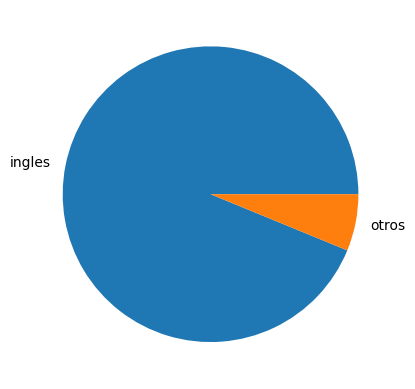

In [55]:
# Pie 
plt.pie(data.total,labels=data.idioma)

In [58]:
others = tmp.query("original_language != 'en'").original_language.value_counts()

In [62]:
others = pd.DataFrame(others)
others.columns = ['lenguajes']

In [63]:
# Fastest

In [73]:
movies_without_en = tmp.query("original_language != 'en'")

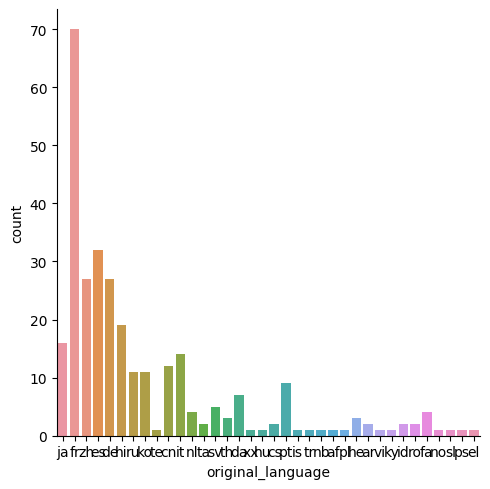

In [74]:
sns.catplot(x='original_language',kind='count',data=movies_without_en)

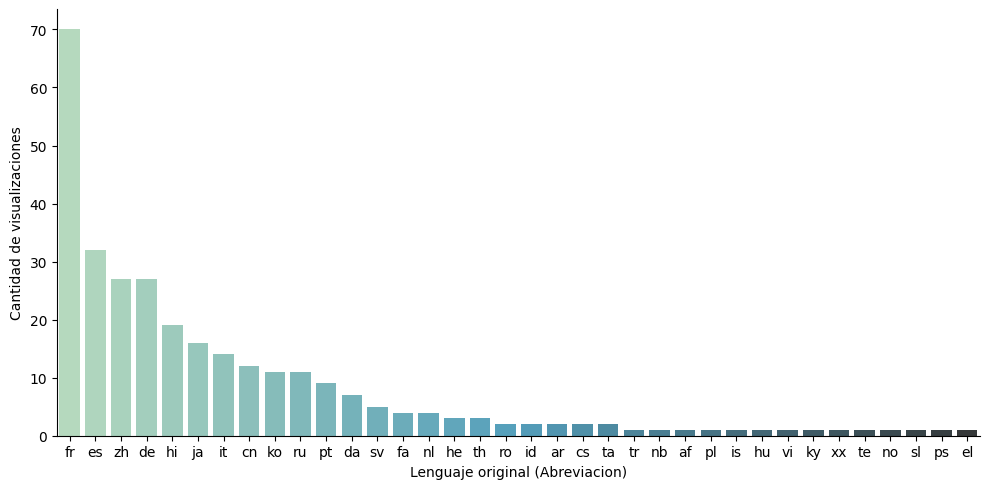

In [82]:
others = tmp.query("original_language != 'en'").original_language.value_counts()
cat = sns.catplot(x='original_language',kind='count',data=movies_without_en,aspect=2,order=others.index,palette='GnBu_d')
cat.set_axis_labels('Lenguaje original (Abreviacion)','Cantidad de visualizaciones')

# 1) Ingles es el mas predominante  2) Distribuicion de otros idiomas

In [83]:
movies.head(2)

,peliculaID,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [85]:
score_toy_story =  df.query("peliculaID==1")
score_toy_story

,usuarioID,peliculaID,nota,instante
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [86]:
score_jumanji =  df.query("peliculaID==2")
score_jumanji

,usuarioID,peliculaID,nota,instante
560,6,2,4.0,845553522
1026,8,2,4.0,839463806
1773,18,2,3.0,1455617462
2275,19,2,3.0,965704331
2977,20,2,3.0,1054038313
...,...,...,...,...
95102,600,2,4.0,1237764627
95965,602,2,4.0,840875851
97044,604,2,5.0,832080293
97144,605,2,3.5,1277176522


In [94]:
print(len(score_jumanji), len(score_toy_story))

110 215


In [104]:
print('El promedio de notas de Toy Story es %.2f' % score_toy_story.nota.mean())
print('El promedio de notas de jumanji es %.2f' %  score_jumanji.nota.mean())

El promedio de notas de Toy Story es 3.92
El promedio de notas de jumanji es 3.43


In [106]:
# El 50% de los usuarios calificaron con una nota mayor a 4 y el otro 50% menor a 4
print('La mediana de notas de Toy Story es %.2f' % score_toy_story.nota.median())
print('La mediana de notas de jumanji es %.2f' %  score_jumanji.nota.median())

La mediana de notas de Toy Story es 4.00
La mediana de notas de jumanji es 3.50


In [107]:
import numpy as np

In [115]:
# Aveces las mediadas de tendencias central no son representaticas en el analisis de los datos
movie1 = np.append(np.array([2.5]*10),np.array([3.5]*10))
movie2 = np.append(np.array([1]*10),np.array([5]*10))

In [111]:
print(movie1.mean(),movie2.mean())

3.0 3.0


In [114]:
print(np.median(movie1),np.median(movie2))

3.0 3.0


C:\Users\jorge\AppData\Local\Temp\ipykernel_10740\3551861624.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movie1)
C:\Users\jorge\AppData\Local\Temp\ipykernel_10740\3551861624.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movie2)


<AxesSubplot: ylabel='Density'>

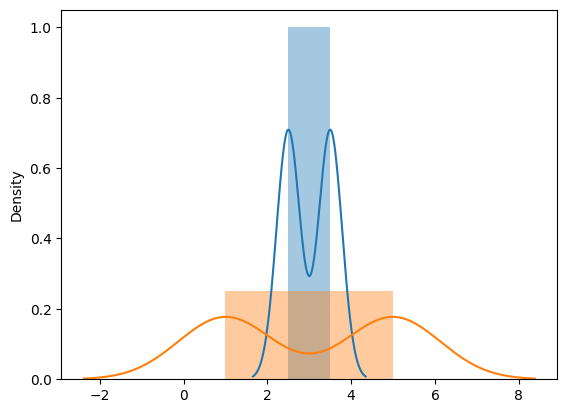

In [120]:
# Se puede concluir que la distribucion es distinta
sns.distplot(movie1)
sns.distplot(movie2)

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

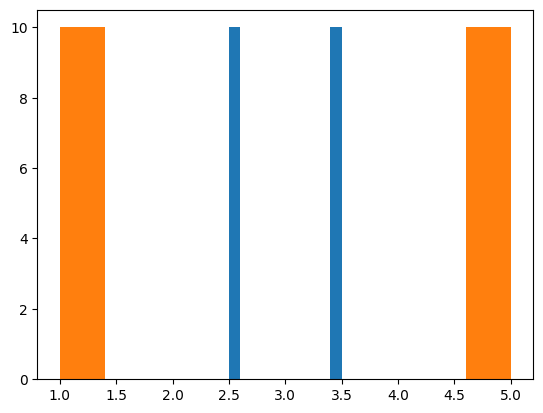

In [133]:
plt.hist(movie1)
plt.hist(movie2)

{'whiskers': [<matplotlib.lines.Line2D at 0x2696f8b2820>,
 'caps': [<matplotlib.lines.Line2D at 0x2696f8b2bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2696f8b21c0>,
 'medians': [<matplotlib.lines.Line2D at 0x2696f92b730>,
 'fliers': [<matplotlib.lines.Line2D at 0x2696f92b940>,
 'means': []}

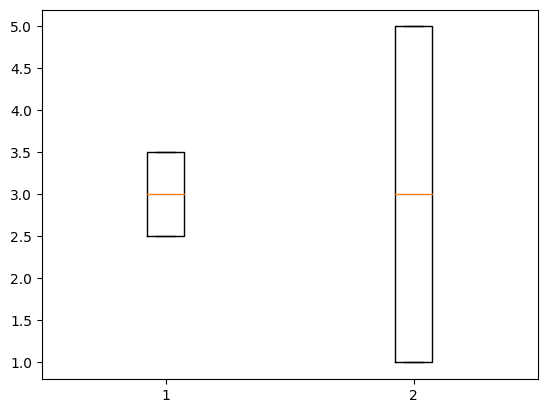

In [123]:
# Media y mediana en 3.0
# se puede ver la concentracion de los datos
plt.boxplot([movie1,movie2])

{'whiskers': [<matplotlib.lines.Line2D at 0x2697102f8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2697102fe50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2697102f790>,
 'medians': [<matplotlib.lines.Line2D at 0x269710013d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x26971001670>,
 'means': []}

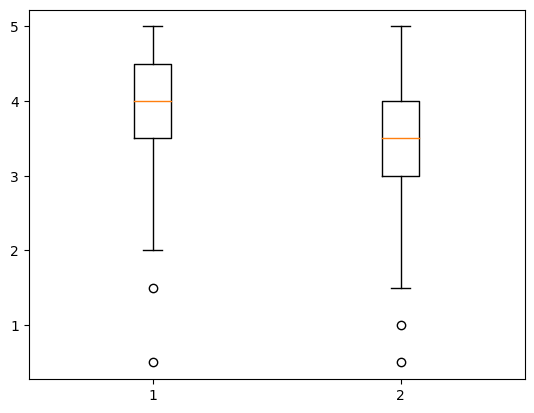

In [125]:
# La distribuicion de datos estan mejor evaluados en toy story
plt.boxplot([score_toy_story.nota,score_jumanji.nota])

<AxesSubplot: xlabel='peliculaID', ylabel='nota'>

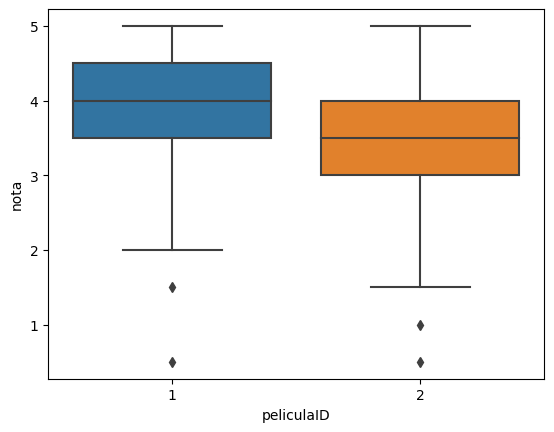

In [127]:
sns.boxplot(x='peliculaID',y='nota',data=df.query('peliculaID in (1,2)'))

<AxesSubplot: xlabel='peliculaID', ylabel='nota'>

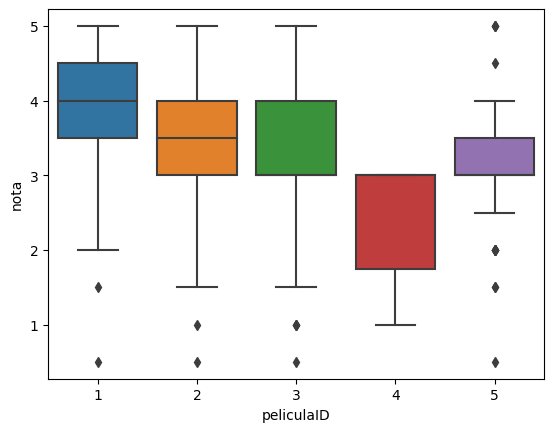

In [128]:
sns.boxplot(x='peliculaID',y='nota',data=df.query('peliculaID in (1,2,3,4,5)'))

In [130]:
# Mide la dispersion de los datos, mientras mas cercano a 1 son mas dispersos.
print('La desviacion estandar de notas de Toy Story es %.2f' % score_toy_story.nota.std())
print('La desviacion estandar de notas de jumanji es %.2f' %  score_jumanji.nota.std())

La desviacion estandar de notas de Toy Story es 0.83
La desviacion estandar de notas de jumanji es 0.88


In [131]:
print(movie1.mean(),movie2.mean())
print(np.median(movie1),np.median(movie2))
print(np.std(movie1),np.std(movie2))

3.0 3.0
3.0 3.0
0.5 2.0
